## Extract TLD in WebRTC Fingerprinting scripts

This notebook extracts the TLDs in WebRTC Fingerprinting scripts. The heuristics to find out the WebRTC Fingerprinting scripts is directly taken from [2019_03_willougr_fingerprinting_implementation_sixth_sense/WebRTC Fingerprinting Heuristics](https://github.com/mozilla/overscripted/blob/master/analyses/2019_03_willougr_fingerprinting_implementation_sixth_sense/WebRTC%20Fingerprinting%20Heuristics.ipynb).

In [1]:
import dask.dataframe as dd
import json

from dask.distributed import Client, progress

DATA_DIR = 'YOUR DATA DIRECTORY HERE'
DATA_DIR_FULL = '/home/soumya/Dataset/sample_0.parquet'
Client()

/home/soumya/.conda/envs/overscripted/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/home/soumya/.conda/envs/overscripted/lib/python3.6/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)
/home/soumya/.conda/envs/overscripted/lib/python3.6/site-packages/distributed/bokeh/core.py:57: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn('\n' + msg)


Client Scheduler: tcp://127.0.0.1:33861 Dashboard: http://127.0.0.1:36361/status,Cluster Workers: 4 Cores: 12 Memory: 8.25 GB


## Setup

In [2]:
df = dd.read_parquet(DATA_DIR_FULL, columns=['script_url', 'symbol', 'location'])
df = df[['script_url', 'symbol', 'location']]
df.head()

,script_url,symbol,location
call_id,,,
1_00006011493ed94fb8010cead84ee610cdbece5de961abe96f0cba54.json__0,https://vk.com/js/api/xdm.js?1449919642,window.name,https://vk.com/widget_comments.php?app=2297596...
1_00006011493ed94fb8010cead84ee610cdbece5de961abe96f0cba54.json__1,https://vk.com/js/api/xdm.js?1449919642,window.name,https://vk.com/widget_comments.php?app=2297596...
1_00006011493ed94fb8010cead84ee610cdbece5de961abe96f0cba54.json__2,https://vk.com/js/al/aes_light.js?592436914,window.navigator.userAgent,https://vk.com/widget_comments.php?app=2297596...
1_00006b1ad6ce7a5b2b81a8ef96f0778853ea6d81a97693d85a52790c.json__0,https://cpro.baidustatic.com/cpro/ui/noexpire/...,window.navigator.userAgent,https://pos.baidu.com/s?hei=70&wid=670&di=u313...
1_0000813d43acf1fe219ada01597cfb1d5dc9c12b61f343c6cfac362b.json__0,https://apis.google.com/js/plusone.js?_=151338...,window.document.cookie,http://serienjunkies.org/smilf/smilf-season-1-...


## Pull out Candidate URLs for RTCPeerConnection.onicecandidate

In [ ]:
onicecandidate_candidate_urls_df = df[df.symbol == 'RTCPeerConnection.onicecandidate']
onicecandidate_candidate_urls_df = onicecandidate_candidate_urls_df[['script_url', 'location']].drop_duplicates().persist()
progress(onicecandidate_candidate_urls_df, notebook=False)

/home/soumya/.local/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


[###                                     ] | 8% Completed | 50.4s

In [4]:
onicecandidate_candidate_urls_df = onicecandidate_candidate_urls_df.compute()
onicecandidate_candidate_urls_df.head()

In [5]:
onicecandidate_candidate_urls = set(onicecandidate_candidate_urls_df.itertuples(index=False))

## Pull out Candidate URLs for RTCPeerConnection.createDataChannel

In [6]:
create_data_channel_candidate_urls_df = df[df.symbol == 'RTCPeerConnection.createDataChannel']
create_data_channel_candidate_urls_df = create_data_channel_candidate_urls_df[['script_url', 'location']].drop_duplicates().persist()
progress(create_data_channel_candidate_urls_df, notebook=False)

In [7]:
create_data_channel_candidate_urls_df = create_data_channel_candidate_urls_df.compute()
create_data_channel_candidate_urls_df.head()

,script_url,location
call_id,,
1_0001e211e7dd3877ff0243ae0ba0d1f6f9963ca210656cbd8c53681a.json__149,https://g.alicdn.com/secdev/sufei_data/3.2.2/i...,https://maniform.world.tmall.com/category-1282...
1_00192dd939606d0cf33d4ad4b9af45016033991bd0ca23e445186a63.json__15,http://g.alicdn.com/secdev/sufei_data/3.2.2/in...,http://c.youku.com/abouteg/youtu
1_004010408d52b4795f9c28996bc478ce21097bd70a25c5ec32b06588.json__104,https://g.alicdn.com/secdev/sufei_data/3.2.2/i...,https://list.tmall.com/search_product.htm?acm=...
1_006fa636a8391d1f4f4b79dcb0a6b76f1121b488f31b7159a13572b9.json__93,https://g.alicdn.com/secdev/sufei_data/3.2.2/i...,https://list.tmall.com/search_product.htm?abbu...
1_009b1cd1cc99c638f3ca546996cc3fade323d725907078138bf457d6.json__42,https://g.alicdn.com/security/umscript/3.3.2/u...,https://login.taobao.com/member/login.jhtml?fr...


In [8]:
create_data_channel_candidate_urls = set(create_data_channel_candidate_urls_df.itertuples(index=False))

## Pull out Candidate URLs for RTCPeerConnection.createOffer

In [ ]:
create_offer_candidate_urls_df = df[df.symbol == 'RTCPeerConnection.createOffer']
create_offer_candidate_urls_df = create_offer_candidate_urls_df[['script_url', 'location']].drop_duplicates().persist()
progress(create_offer_candidate_urls_df, notebook=False)

In [ ]:
create_offer_candidate_urls_df = create_offer_candidate_urls_df.compute()
create_offer_candidate_urls_df.head()

,script_url,location
call_id,,
1_0001e211e7dd3877ff0243ae0ba0d1f6f9963ca210656cbd8c53681a.json__150,https://g.alicdn.com/secdev/sufei_data/3.2.2/i...,https://maniform.world.tmall.com/category-1282...
1_00192dd939606d0cf33d4ad4b9af45016033991bd0ca23e445186a63.json__16,http://g.alicdn.com/secdev/sufei_data/3.2.2/in...,http://c.youku.com/abouteg/youtu
1_004010408d52b4795f9c28996bc478ce21097bd70a25c5ec32b06588.json__105,https://g.alicdn.com/secdev/sufei_data/3.2.2/i...,https://list.tmall.com/search_product.htm?acm=...
1_006fa636a8391d1f4f4b79dcb0a6b76f1121b488f31b7159a13572b9.json__94,https://g.alicdn.com/secdev/sufei_data/3.2.2/i...,https://list.tmall.com/search_product.htm?abbu...
1_009b1cd1cc99c638f3ca546996cc3fade323d725907078138bf457d6.json__43,https://g.alicdn.com/security/umscript/3.3.2/u...,https://login.taobao.com/member/login.jhtml?fr...


In [ ]:
create_offer_candidate_urls = set(create_offer_candidate_urls_df.itertuples(index=False))

## URLs should call all of: [RTCPeerConnection.onicecandidate, RTCPeerConnection.createDataChannel, RTCPeerConnection.createOffer]

In [ ]:
all_candidate_urls = onicecandidate_candidate_urls | create_data_channel_candidate_urls | create_offer_candidate_urls
candidate_urls = onicecandidate_candidate_urls & create_data_channel_candidate_urls & create_offer_candidate_urls

In [ ]:
print('# of unique tuples (script_url, location) that call all 3 symbols:', len(candidate_urls))
print('# of unique tuples (script_url, location) that only call 1 or 2 symols:', len(all_candidate_urls - candidate_urls))

# of unique tuples (script_url, location) that call all 3 symbols: 1224
# of unique tuples (script_url, location) that only call 1 or 2 symols: 664


In [ ]:
with open('not_webrtc_multi_symbol_fingerprinting_1.json', 'w') as f:
    f.write(json.dumps(list(set([script_url for script_url, location in (all_candidate_urls - candidate_urls)]))))

Note: conversion from a list to a set to a list above is used in case the same script_url is called from multiple locations

## Drop false positives

In [ ]:
false_positives = {
    "nextwebsnetworks.com/in/video",
    "nextwebsnetworks.com/in/remnant",
    "sandbox02.kaxsdc.com/collect/logo.htm",
    "digitalforexnfashionstyles.com/sms4send2.php",
    "www.badlion.net/",
    "ajax.googleapis.com/ajax/libs/jquery/1.8/jquery.min.js"
}

webrtc_fp_urls = set([(script_url, location) for script_url, location in candidate_urls if script_url not in false_positives])

In [ ]:
print('# of unique tuples (script_url, location) that were false positives:', len(candidate_urls - webrtc_fp_urls))
print('# of unique tuples (script_url, location) that used WebRTC fingerprinting:', len(webrtc_fp_urls))

# of unique tuples (script_url, location) that were false positives: 0
# of unique tuples (script_url, location) that used WebRTC fingerprinting: 1224


In [ ]:
with open('not_webrtc_multi_symbol_fingerprinting_2.json', 'w') as f:
    f.write(json.dumps(list(set([script_url for script_url, location in (candidate_urls - webrtc_fp_urls)]))))

## Save Candidate URLs

In [ ]:
with open('webrtc_multi_symbol_fingerprinting.json', 'w') as f:
    f.write(json.dumps(list(set([script_url for script_url, location in webrtc_fp_urls]))))

## Find Locations

In [ ]:
with open('webrtc_multi_symbol_fingerprinting.json', 'r') as f:
    webrtc_fp_urls = json.load(f)
    
print(len(webrtc_fp_urls), '== 1313')

230 == 1313


In [ ]:
df = dd.read_parquet(DATA_DIR_FULL, columns=['script_url', 'location'])

In [ ]:
df_locs = df[df.script_url.isin(webrtc_fp_urls)]
locs = df_locs.location.unique().persist()
progress(locs, notebook=False)

In [ ]:
print('# of locations that call WebRTC fingerprinting scripts:', len(locs))

# of locations that call WebRTC fingerprinting scripts: 1376


In [ ]:
webrtc_fp_urls[0:5]

['https://www.westernunion.com/etc/clientlibs/westernunion/wu_common.js?seed=AMC0qWFgAQAA3daqXevDq9gMSnOX_iS5bPawtu5rBu6_sH7i6aPGIpPhwcKJ',
 'https://imgs.signifyd.com/fp/check.js;CIS3SID=46FAAF9D930623535273CF4E2B2782CC?org_id=w2txo5aa&session_id=01242de5f6a9596633701c18fda3d767&pageid=1&nonce=02c5fd061a23e90e',
 'https://t1.tacdn.com/fp/check.js;CIS3SID=1A4F45FF67BC329B2A5E8D83E9F866A4?org_id=0w57c49k&session_id=7db13b749160429de9b5b5a1053693a5&pageid=1&nonce=9885f23990657754',
 'https://js.ad-score.com/score.min.js?pid=1000343&tt=g#tid=DFP_JS&l1=/15188745/Lipsum-Unit3&l2=lipsum.com&l3=https://fi.lipsum.com/&phfl=l6&uip=%%USER_IP%%&pub_domain=https://fi.lipsum.com/&ref=https://fi.lipsum.com/&cb=7763056',
 'https://static.fraudmetrix.cn/fm.js?ver=0.1&t=420401']

## Extract TLD

In [ ]:
import tldextract
opsuffix=[]
opurls=[]
for i in range(len(webrtc_fp_urls)):
    opurls.append(tldextract.extract(webrtc_fp_urls[i]))
    opsuffix.append(opurls[i].suffix)
opsuffix[0:50]

['com',
 'com',
 'com',
 'com',
 'cn',
 'ua',
 'com',
 'es',
 '',
 'cn',
 'com',
 'photos',
 'com',
 'com',
 'com',
 'com',
 'com',
 'com',
 'com',
 'com',
 'com',
 'cn',
 'com',
 'com',
 'com',
 'net',
 'cn',
 'com',
 'com',
 'com',
 'com',
 'ua',
 'com',
 'com',
 'com',
 'ua',
 'com',
 'vn',
 'net',
 'ua',
 'com',
 'com',
 'com',
 'com',
 'com.br',
 'com',
 'com',
 'photos',
 'com',
 'com']

In [ ]:
len(webrtc_fp_urls)

230

## Frequency of each TLD

In [ ]:
import collections
for i in range(len(opsuffix)):
    counter=collections.Counter(opsuffix)
print(counter)

Counter({'com': 143, 'cn': 42, 'ua': 22, 'net': 11, 'photos': 4, 'vn': 2, 're': 2, 'es': 1, '': 1, 'com.br': 1, 'io': 1})


In [ ]:
len(counter)

11

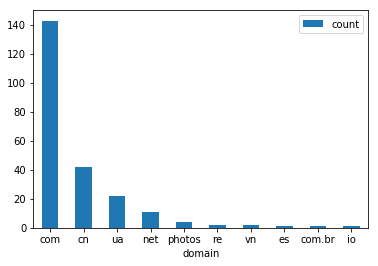

In [29]:
import pandas as pd
dfplot = pd.DataFrame({'domain':['com','cn','ua','net', 'photos','re','vn','es','com.br','io'], 'count':[143,42,22,11,4,2,2,1,1,1]})
ax = dfplot.plot.bar(x='domain', y='count', rot=0)